In [1]:
# ЯЧЕЙКА 2: Импорты всех библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Магическая команда для графиков
%matplotlib inline

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

# ML библиотеки
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Метрики
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report, 
    roc_curve, precision_recall_curve
)

# Для дисбаланса
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

print("✅ Все импорты выполнены!")

✅ Все импорты выполнены!


In [9]:
import kagglehub
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import kagglehub

# Download latest version
path = kagglehub.dataset_download("benjaminmcgregor/german-credit-data-set-with-credit-risk")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 11.3k/11.3k [00:00<00:00, 5.20MB/s]

Extracting files...
Path to dataset files: /Users/vasya.snizhko1/.cache/kagglehub/datasets/benjaminmcgregor/german-credit-data-set-with-credit-risk/versions/1


In [11]:
import os
import pandas as pd
import numpy as np

# Путь к скачанным данным
path = "/Users/vasya.snizhko1/.cache/kagglehub/datasets/benjaminmcgregor/german-credit-data-set-with-credit-risk/versions/1"

# Посмотрим, какие файлы есть в директории
print("Содержимое директории:")
for item in os.listdir(path):
    item_path = os.path.join(path, item)
    if os.path.isfile(item_path):
        size = os.path.getsize(item_path) / 1024  # размер в КБ
        print(f"  Файл: {item} ({size:.1f} KB)")
    else:
        print(f"  Папка: {item}/")

# Поищем CSV файлы
import glob
csv_files = glob.glob(os.path.join(path, "*.csv"))
print(f"\nНайдено CSV файлов: {len(csv_files)}")
for csv in csv_files:
    print(f"  {csv}")

# Попробуем загрузить каждый CSV файл
for csv_file in csv_files:
    try:
        print(f"\nПопытка загрузить: {os.path.basename(csv_file)}")
        df_test = pd.read_csv(csv_file)
        print(f"  Успешно! Размер: {df_test.shape}")
        print(f"  Колонки: {df_test.columns.tolist()}")
        print(f"  Первые строки:")
        print(df_test.head())
        print(f"  Информация:")
        print(df_test.info())
        
        # Проверим, есть ли целевая переменная
        if 'Risk' in df_test.columns or 'risk' in df_test.columns or 'default' in df_test.columns:
            print(f"  ✓ Найдена целевая переменная!")
            df = df_test.copy()
            break
    except Exception as e:
        print(f"  Ошибка при загрузке: {e}")

# Если не нашли, попробуем другие форматы
if 'df' not in locals():
    # Проверим Excel файлы
    excel_files = glob.glob(os.path.join(path, "*.xls*"))
    for excel in excel_files:
        try:
            print(f"\nПопытка загрузить Excel: {os.path.basename(excel)}")
            df_test = pd.read_excel(excel)
            print(f"  Успешно! Размер: {df_test.shape}")
            print(f"  Колонки: {df_test.columns.tolist()}")
            df = df_test.copy()
            break
        except Exception as e:
            print(f"  Ошибка при загрузке: {e}")

Содержимое директории:
  Файл: reintegrate_credit_score.py (0.8 KB)
  Файл: german_credit_data_updated.csv (48.2 KB)

Найдено CSV файлов: 1
  /Users/vasya.snizhko1/.cache/kagglehub/datasets/benjaminmcgregor/german-credit-data-set-with-credit-risk/versions/1/german_credit_data_updated.csv

Попытка загрузить: german_credit_data_updated.csv
  Успешно! Размер: (954, 11)
  Колонки: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Credit Risk']
  Первые строки:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Cr

АНАЛИЗ ДАТАСЕТА С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
Размер датасета: (954, 11)

Колонки: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Credit Risk']

Первые 5 строк:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Credit Risk  
0           1169         6             radio/TV            1  
1           5951        48             radio/TV            2  
2           2096        12            education            1  
3           7882        42  furniture/equipment            

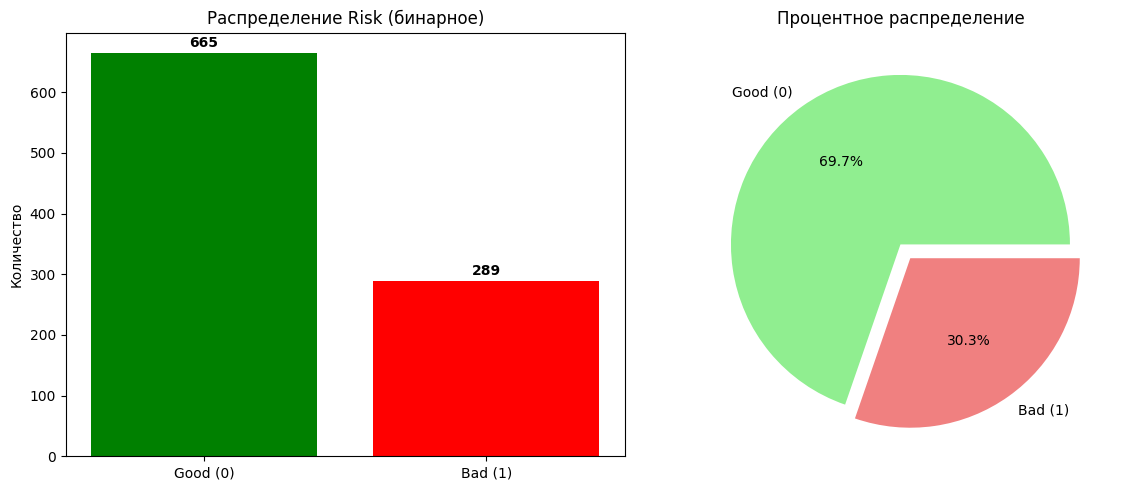


2. ПРЕДОБРАБОТКА ДАННЫХ
Колонки после удаления индекса: ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']

Пропущенные значения:
Saving accounts     175
Checking account    378
dtype: int64

Обработка пропусков в 'Saving accounts':
  Пропусков: 175
  Заполнено значением: 'little'

Обработка пропусков в 'Checking account':
  Пропусков: 378
  Заполнено значением: 'little'

Категориальные признаки для кодирования: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
  'Sex' закодирован, уникальных значений: 2
  'Housing' закодирован, уникальных значений: 3
  'Saving accounts' закодирован, уникальных значений: 4
  'Checking account' закодирован, уникальных значений: 3
  'Purpose' закодирован, уникальных значений: 8

Создание новых признаков:
  Создано 3 новых признака

3. РАЗДЕЛЕНИЕ НА TRAIN И TEST SETS
Признаки (X): (954, 12)
Целевая (y): (954,)

Разделение выполнено:
  Train set: X=(763, 12), y=(763,)


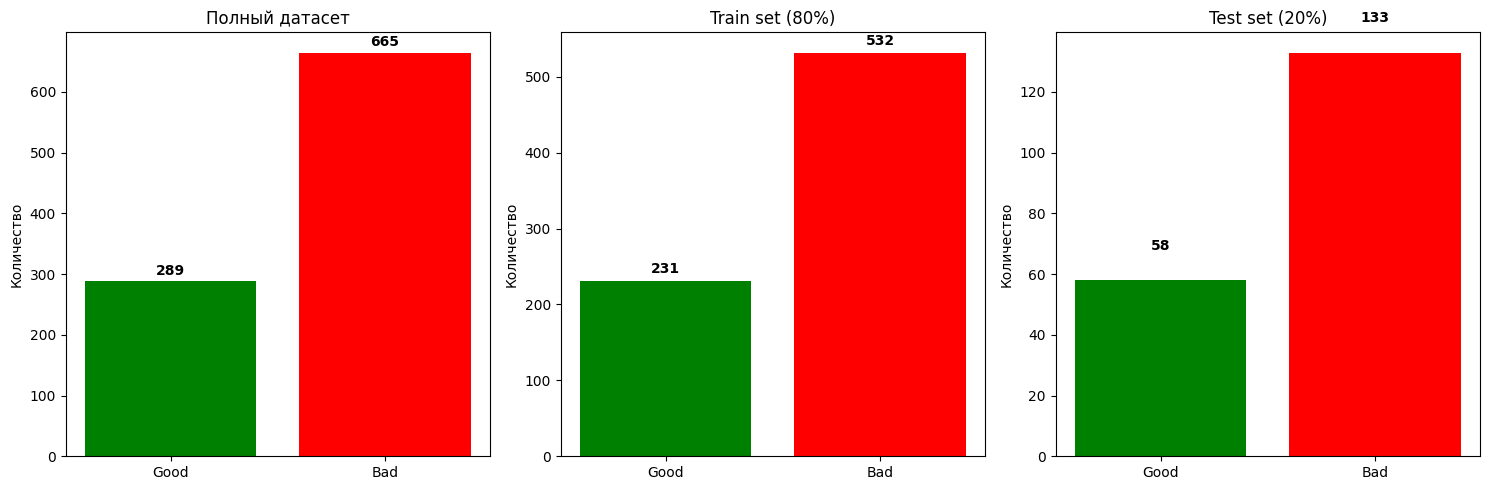


4. МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
Числовые признаки для масштабирования (12):
['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Credit_to_Income_Ratio', 'Monthly_Payment', 'Age_Group']

Масштабирование завершено!
Признаки центрированы (mean=0) и нормированы (std=1)

Статистика до масштабирования (первые 3 признака):
        Age   Sex   Job
mean  35.30  0.69  1.91
std   11.33  0.46  0.64

Статистика после масштабирования (первые 3 признака):
      Age  Sex  Job
mean -0.0  0.0  0.0
std   1.0  1.0  1.0

5. БАЛАНСИРОВКА КЛАССОВ (SMOTE)
До балансировки:
  Train set: Good=231, Bad=532
  Соотношение: 0.43:1

После балансировки (SMOTE):
  Train set: Good=532, Bad=532
  Соотношение: 1:1 (полностью сбалансировано)

✅ РЕЗЮМЕ ПОДГОТОВКИ ДАННЫХ

Итоговые наборы данных:
  1. Оригинальный датасет: (954, 13)
  2. Train set (80%): (763, 12)
  3. Test set (20%): (191, 12)
  4. Train balanced (SMOTE): (1064, 12)

Готовые данные для моделей:
  • X

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Загрузим данные
df = pd.read_csv('/Users/vasya.snizhko1/.cache/kagglehub/datasets/benjaminmcgregor/german-credit-data-set-with-credit-risk/versions/1/german_credit_data_updated.csv')

print("="*60)
print("АНАЛИЗ ДАТАСЕТА С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ")
print("="*60)

print(f"Размер датасета: {df.shape}")
print(f"\nКолонки: {df.columns.tolist()}")
print(f"\nПервые 5 строк:")
print(df.head())
print(f"\nИнформация о данных:")
print(df.info())

# ============================================
# 1. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
# ============================================

print("\n" + "="*60)
print("1. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'Credit Risk'")
print("="*60)

# Посмотрим распределение
print("\nРаспределение Credit Risk:")
risk_counts = df['Credit Risk'].value_counts().sort_index()
print(risk_counts)

# Преобразуем в бинарную классификацию:
# 1 = Bad Risk (плохой) -> 1
# 2 = Good Risk (хороший) -> 0
df['Risk'] = df['Credit Risk'].map({1: 1, 2: 0})  # 1=Bad, 0=Good
df = df.drop('Credit Risk', axis=1)

print("\nПосле преобразования (1=Bad, 0=Good):")
print(df['Risk'].value_counts())
print(f"\nПроцент плохих заемщиков: {(df['Risk'].sum() / len(df) * 100):.1f}%")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
risk_counts_new = df['Risk'].value_counts()
axes[0].bar(['Good (0)', 'Bad (1)'], risk_counts_new.values, color=['green', 'red'])
axes[0].set_title('Распределение Risk (бинарное)')
axes[0].set_ylabel('Количество')
for i, v in enumerate(risk_counts_new.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(risk_counts_new.values, labels=['Good (0)', 'Bad (1)'], 
           autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'],
           explode=(0, 0.1))
axes[1].set_title('Процентное распределение')

plt.tight_layout()
plt.show()

# ============================================
# 2. ПРЕДОБРАБОТКА ДАННЫХ
# ============================================

print("\n" + "="*60)
print("2. ПРЕДОБРАБОТКА ДАННЫХ")
print("="*60)

# Удалим индексную колонку
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(f"Колонки после удаления индекса: {df.columns.tolist()}")

# Проверим пропущенные значения
print("\nПропущенные значения:")
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("Нет пропущенных значений!")

# Обработка пропусков (если есть)
for col in ['Saving accounts', 'Checking account']:
    if col in df.columns and df[col].isnull().sum() > 0:
        print(f"\nОбработка пропусков в '{col}':")
        print(f"  Пропусков: {df[col].isnull().sum()}")
        # Заполним наиболее частым значением
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"  Заполнено значением: '{mode_val}'")

# Кодирование категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nКатегориальные признаки для кодирования: {categorical_cols}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"  '{col}' закодирован, уникальных значений: {len(le.classes_)}")

# Создадим несколько новых признаков
print("\nСоздание новых признаков:")
df['Credit_to_Income_Ratio'] = df['Credit amount'] / (df['Age'] * 1000 + 1)
df['Monthly_Payment'] = df['Credit amount'] / df['Duration']
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 50, 75], labels=[0, 1, 2, 3]).astype(int)
print(f"  Создано 3 новых признака")

# ============================================
# 3. РАЗДЕЛЕНИЕ НА TRAIN И TEST
# ============================================

print("\n" + "="*60)
print("3. РАЗДЕЛЕНИЕ НА TRAIN И TEST SETS")
print("="*60)

# Разделим на признаки (X) и целевую переменную (y)
X = df.drop('Risk', axis=1)
y = df['Risk']

print(f"Признаки (X): {X.shape}")
print(f"Целевая (y): {y.shape}")

# Разделение на train и test
# Обычное разделение: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% на тест
    random_state=42,         # для воспроизводимости
    stratify=y               # сохраняем распределение классов
)

print(f"\nРазделение выполнено:")
print(f"  Train set: X={X_train.shape}, y={y_train.shape}")
print(f"  Test set:  X={X_test.shape}, y={y_test.shape}")

print(f"\nРаспределение классов в train:")
print(y_train.value_counts())
print(f"Процент плохих в train: {(y_train.sum() / len(y_train) * 100):.1f}%")

print(f"\nРаспределение классов в test:")
print(y_test.value_counts())
print(f"Процент плохих в test:  {(y_test.sum() / len(y_test) * 100):.1f}%")

# Визуализация разделения
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Распределение в полном датасете
axes[0].bar(['Good', 'Bad'], [len(y)-y.sum(), y.sum()], color=['green', 'red'])
axes[0].set_title('Полный датасет')
axes[0].set_ylabel('Количество')

# Распределение в train
axes[1].bar(['Good', 'Bad'], [len(y_train)-y_train.sum(), y_train.sum()], color=['green', 'red'])
axes[1].set_title('Train set (80%)')
axes[1].set_ylabel('Количество')

# Распределение в test
axes[2].bar(['Good', 'Bad'], [len(y_test)-y_test.sum(), y_test.sum()], color=['green', 'red'])
axes[2].set_title('Test set (20%)')
axes[2].set_ylabel('Количество')

for i, (data, title) in enumerate(zip([y, y_train, y_test], ['Полный', 'Train', 'Test'])):
    good = len(data) - data.sum()
    bad = data.sum()
    axes[i].text(0, good + 10, str(good), ha='center', fontweight='bold')
    axes[i].text(1, bad + 10, str(bad), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# 4. МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
# ============================================

print("\n" + "="*60)
print("4. МАСШТАБИРОВАНИЕ ПРИЗНАКОВ")
print("="*60)

# Масштабирование только числовых признаков
scaler = StandardScaler()

# Выделим числовые признаки
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовые признаки для масштабирования ({len(numeric_cols)}):")
print(numeric_cols)

# Масштабируем train и test отдельно (важно!)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nМасштабирование завершено!")
print("Признаки центрированы (mean=0) и нормированы (std=1)")

# Проверим масштабирование
print("\nСтатистика до масштабирования (первые 3 признака):")
print(X_train[numeric_cols[:3]].describe().loc[['mean', 'std']].round(2))

print("\nСтатистика после масштабирования (первые 3 признака):")
print(X_train_scaled[numeric_cols[:3]].describe().loc[['mean', 'std']].round(2))

# ============================================
# 5. БОРЬБА С ДИСБАЛАНСОМ КЛАССОВ (ОПЦИОНАЛЬНО)
# ============================================

print("\n" + "="*60)
print("5. БАЛАНСИРОВКА КЛАССОВ (SMOTE)")
print("="*60)

from imblearn.over_sampling import SMOTE

print(f"До балансировки:")
print(f"  Train set: Good={len(y_train)-y_train.sum()}, Bad={y_train.sum()}")
print(f"  Соотношение: {(len(y_train)-y_train.sum())/y_train.sum():.2f}:1")

# Применяем SMOTE только к train set!
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nПосле балансировки (SMOTE):")
print(f"  Train set: Good={len(y_train_balanced)-y_train_balanced.sum()}, Bad={y_train_balanced.sum()}")
print(f"  Соотношение: 1:1 (полностью сбалансировано)")

# ============================================
# 6. КРАТКОЕ РЕЗЮМЕ
# ============================================

print("\n" + "="*60)
print("✅ РЕЗЮМЕ ПОДГОТОВКИ ДАННЫХ")
print("="*60)

print(f"\nИтоговые наборы данных:")
print(f"  1. Оригинальный датасет: {df.shape}")
print(f"  2. Train set (80%): {X_train.shape}")
print(f"  3. Test set (20%): {X_test.shape}")
print(f"  4. Train balanced (SMOTE): {X_train_balanced.shape}")

print(f"\nГотовые данные для моделей:")
print(f"  • X_train_scaled: {X_train_scaled.shape} (несбалансированный)")
print(f"  • X_train_balanced: {X_train_balanced.shape} (сбалансированный)")
print(f"  • X_test_scaled: {X_test_scaled.shape}")
print(f"  • y_train: {y_train.shape}")
print(f"  • y_train_balanced: {y_train_balanced.shape}")
print(f"  • y_test: {y_test.shape}")

print(f"\n📁 Сохранение подготовленных данных...")

# Сохраним подготовленные данные
import pickle

data_dict = {
    'X_train_scaled': X_train_scaled,
    'X_train_balanced': X_train_balanced,
    'X_test_scaled': X_test_scaled,
    'y_train': y_train,
    'y_train_balanced': y_train_balanced,
    'y_test': y_test,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': X.columns.tolist()
}

with open('credit_data_prepared.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print("✅ Данные сохранены в 'credit_data_prepared.pkl'")

print("\n" + "="*60)
print("🎯 ДАННЫЕ ГОТОВЫ ДЛЯ МОДЕЛИРОВАНИЯ!")
print("="*60)
print("\nТеперь можно строить модели:")
print("1. Логистическая регрессия (базовая модель)")
print("2. Случайный лес")
print("3. Градиентный бустинг (XGBoost)")
print("4. K-ближайших соседей")
print("\nИ сравнить их метрики на тестовом наборе!")

🎯 СРАВНЕНИЕ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ
📊 Данные загружены:
  Train (сбалансированный): (1064, 12)
  Test: (191, 12)

1. НАСТРОЙКА МОДЕЛЕЙ
Модели для сравнения:
  • Logistic Regression
  • Random Forest
  • XGBoost
  • K-Nearest Neighbors

2. ОБУЧЕНИЕ МОДЕЛЕЙ

📊 Logistic Regression
----------------------------------------
  Обучено на сбалансированных данных (SMOTE)
  Accuracy:  0.634
  ROC-AUC:   0.599
  Precision (Bad): 0.784
  Recall (Bad):    0.654

📊 Random Forest
----------------------------------------
  Обучено на сбалансированных данных (SMOTE)
  Accuracy:  0.702
  ROC-AUC:   0.701
  Precision (Bad): 0.775
  Recall (Bad):    0.805

📊 XGBoost
----------------------------------------
  Обучено на сбалансированных данных (SMOTE)
  Accuracy:  0.670
  ROC-AUC:   0.681
  Precision (Bad): 0.761
  Recall (Bad):    0.767

📊 K-Nearest Neighbors
----------------------------------------
  Обучено на оригинальных данных
  Accuracy:  0.717
  ROC-AUC:   0.625
  Precision (Bad): 0.752
  Recall

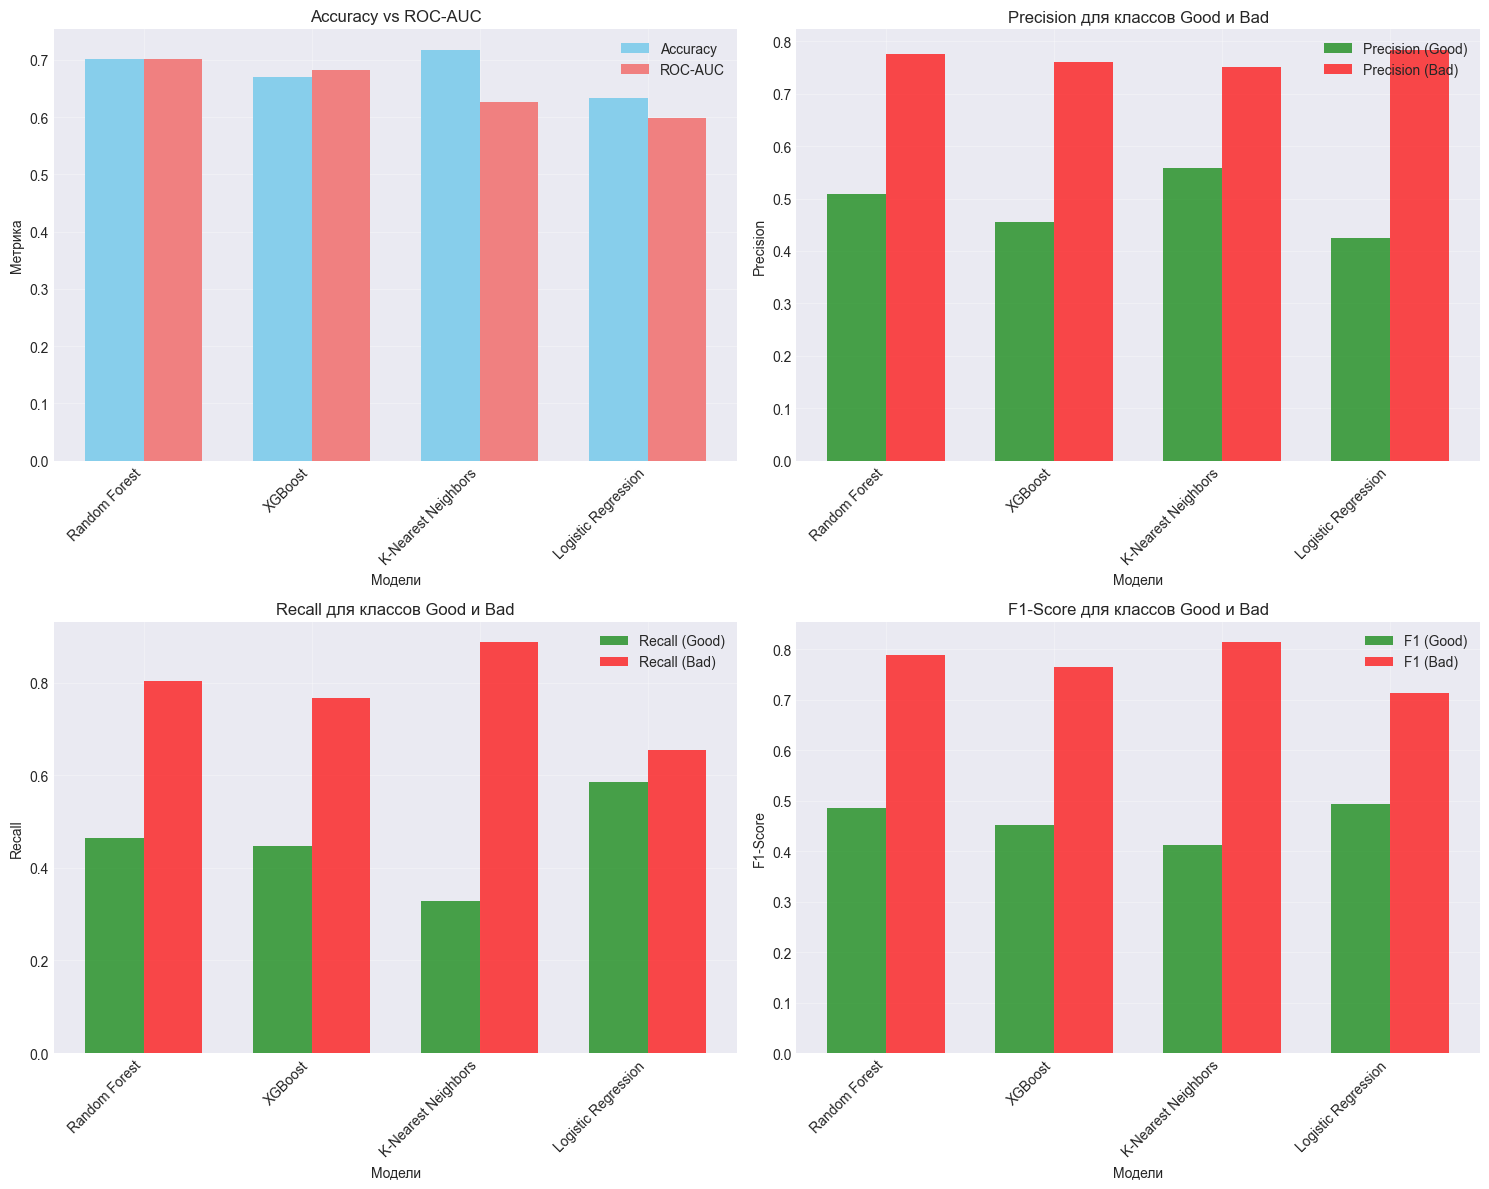


4. МАТРИЦЫ ОШИБОК (CONFUSION MATRICES)


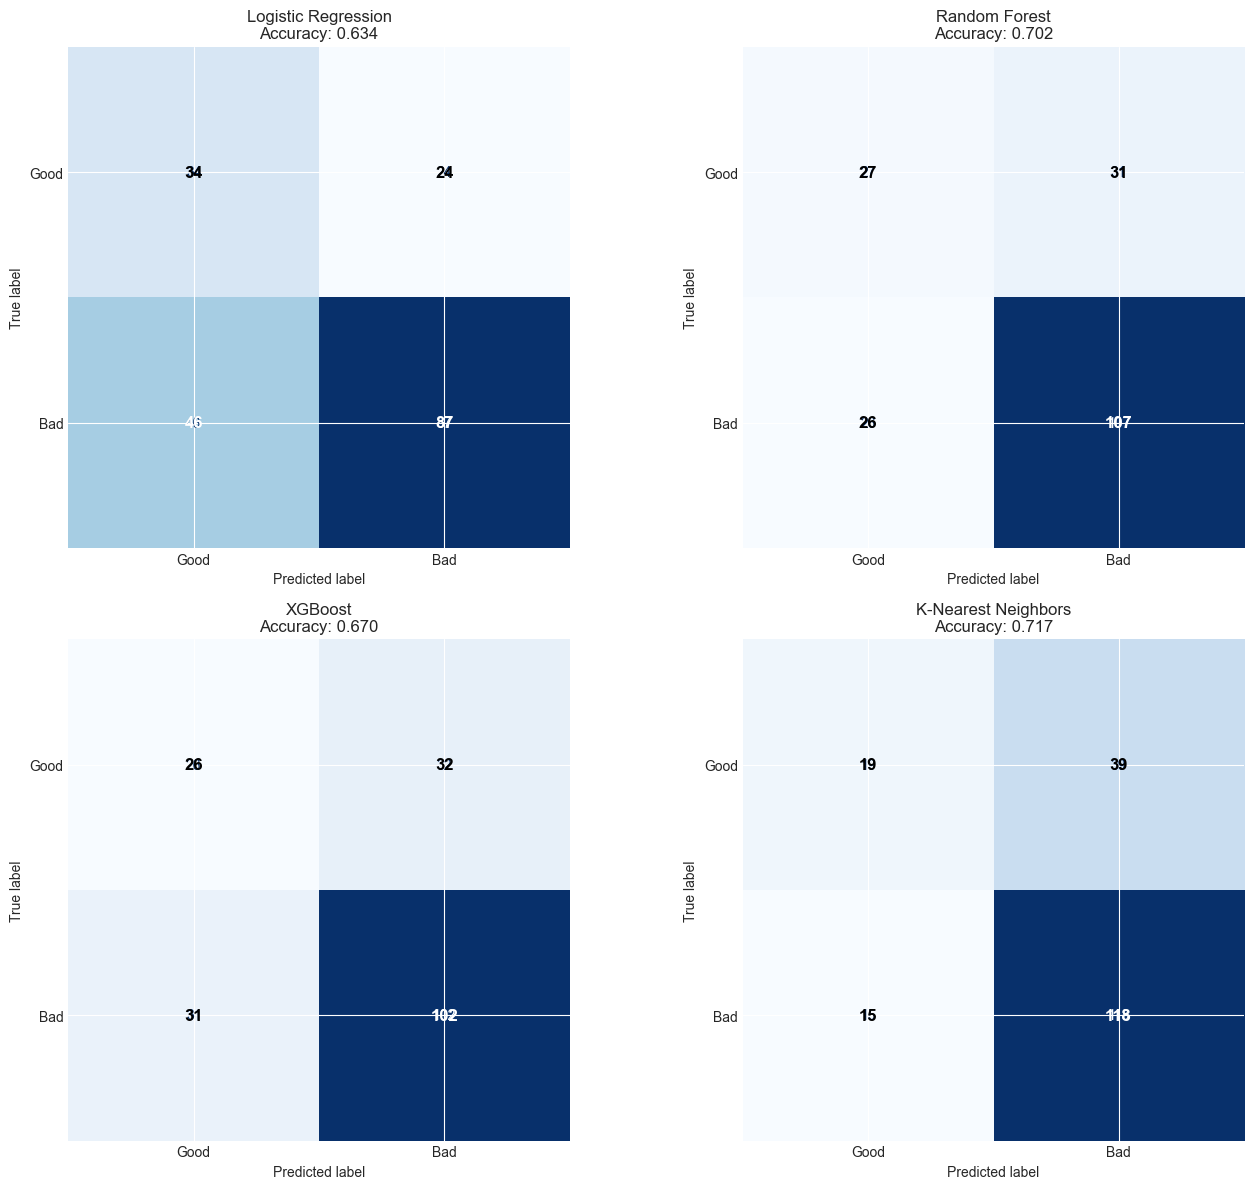


📊 ИНТЕРПРЕТАЦИЯ МАТРИЦ ОШИБОК:
------------------------------------------------------------
True Positive (TP): Правильно предсказанные Bad
True Negative (TN): Правильно предсказанные Good
False Positive (FP): Good, предсказанные как Bad (потеря прибыли)
False Negative (FN): Bad, предсказанные как Good (убытки)

💡 В кредитном скоринге обычно важнее минимизировать FN (убытки)!

5. ROC-КРИВЫЕ


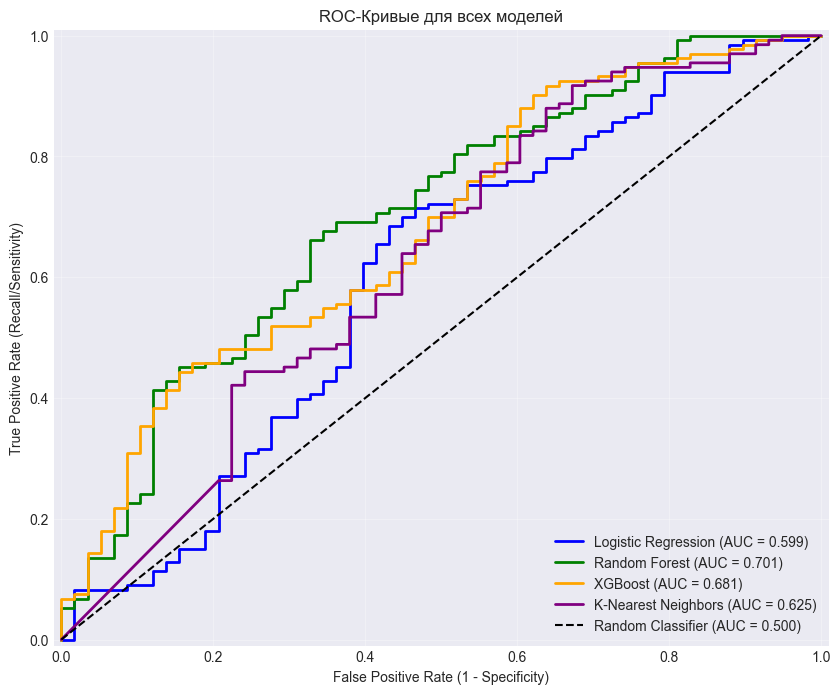


6. PRECISION-RECALL КРИВЫЕ (для класса Bad)


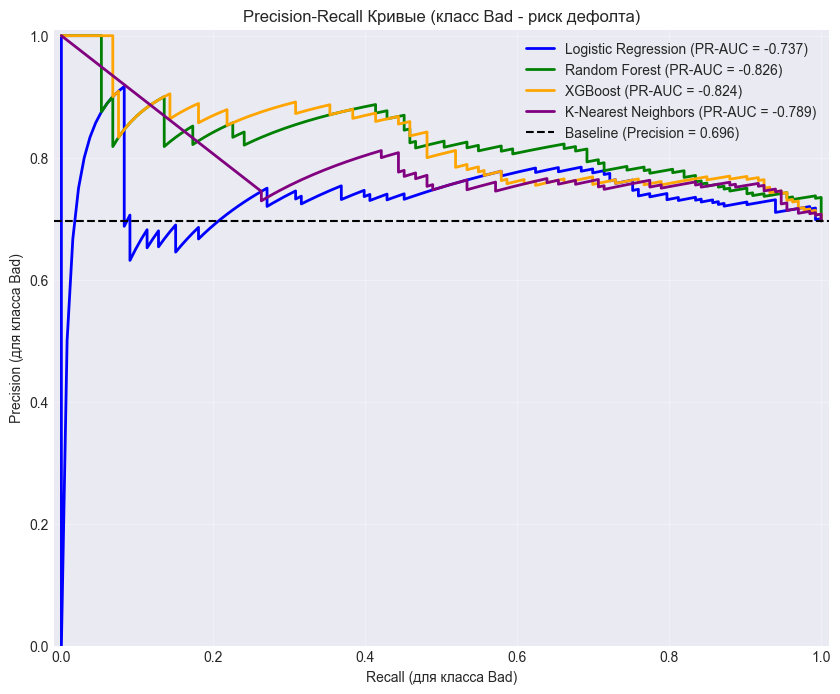


7. ВАЖНОСТЬ ПРИЗНАКОВ (FEATURE IMPORTANCE)

🔝 Топ-10 самых важных признаков (Random Forest):
                  Feature  Importance
0         Monthly_Payment      0.1365
1                Duration      0.1314
2  Credit_to_Income_Ratio      0.1228
3           Credit amount      0.1158
4                     Age      0.1085
5                 Purpose      0.0908
6         Saving accounts      0.0728
7               Age_Group      0.0566
8        Checking account      0.0564
9                     Job      0.0435


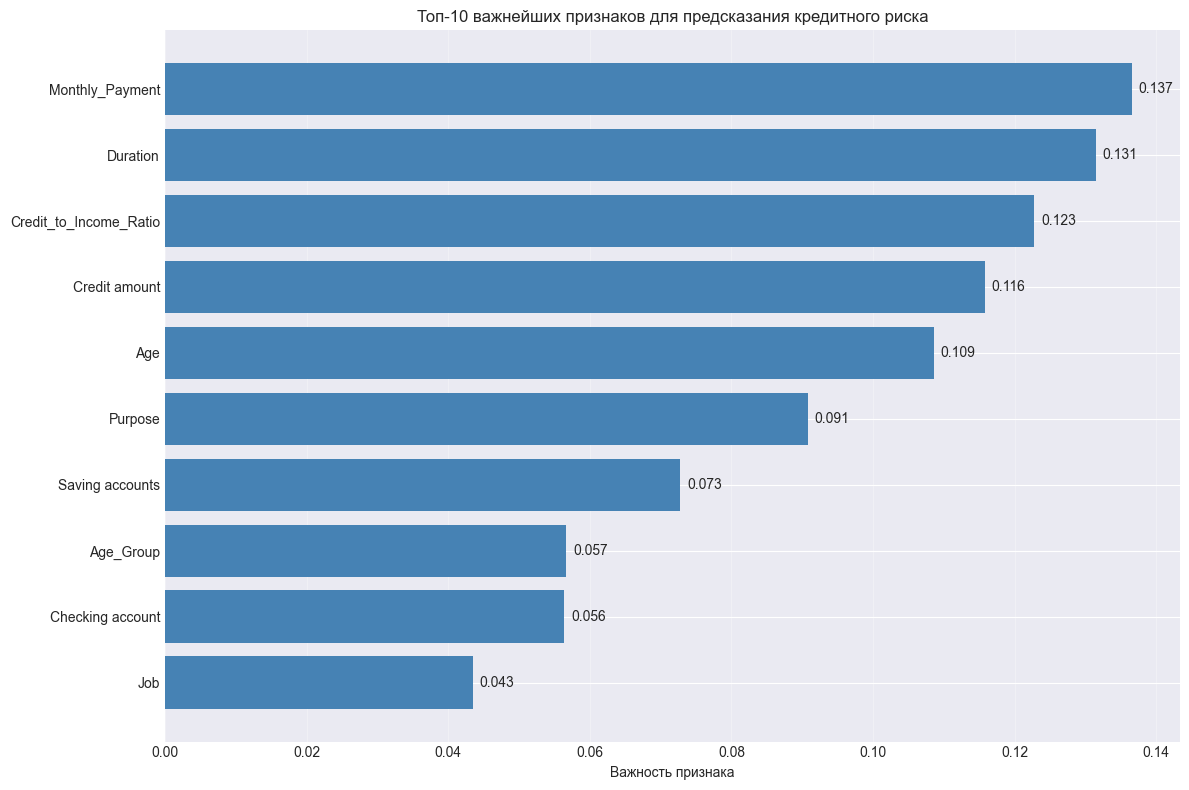


8. БИЗНЕС-АНАЛИЗ И РЕКОМЕНДАЦИИ

🏆 ЛУЧШАЯ МОДЕЛЬ: Random Forest
----------------------------------------
  ROC-AUC:     0.701
  Accuracy:    0.702
  Precision (Bad): 0.775
  Recall (Bad):    0.805

💼 БИЗНЕС-ИНТЕРПРЕТАЦИЯ:
----------------------------------------
На тестовой выборке (191 клиентов):
  • Реально Good клиентов: 58
  • Реально Bad клиентов:  133

Предсказания лучшей модели (Random Forest):
  ✓ Правильно одобрено Good: 27 (прибыль)
  ✗ Неправильно отказано Good: 31 (потерянная прибыль)
  ✓ Правильно отказано Bad: 107 (избежаны убытки)
  ✗ Неправильно одобрено Bad: 26 (потенциальные убытки)

💰 ОЦЕНКА ФИНАНСОВОГО ЭФФЕКТА (при средней сумме кредита 3291):
  • Полученная прибыль: 13331
  • Упущенная прибыль:  15305
  • Избежаные убытки:   176094
  • Потенциальные убытки: 42789
  • Чистый эффект:      131330

9. РЕКОМЕНДАЦИИ

🎯 КАКУЮ МОДЕЛЬ ВЫБРАТЬ:
----------------------------------------
1. Для максимальной прибыли (максимум Good клиентов):
   • Смотрите на высокий Recall для 

In [14]:
# ============================================
# ПОСТРОЕНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve,
                           ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("="*70)
print("🎯 СРАВНЕНИЕ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ")
print("="*70)

# Загрузим подготовленные данные
import pickle
with open('credit_data_prepared.pkl', 'rb') as f:
    data = pickle.load(f)

X_train_scaled = data['X_train_scaled']
X_train_balanced = data['X_train_balanced']
X_test_scaled = data['X_test_scaled']
y_train = data['y_train']
y_train_balanced = data['y_train_balanced']
y_test = data['y_test']

print(f"📊 Данные загружены:")
print(f"  Train (сбалансированный): {X_train_balanced.shape}")
print(f"  Test: {X_test_scaled.shape}")

# ============================================
# 1. ОПРЕДЕЛЕНИЕ МОДЕЛЕЙ
# ============================================

print("\n" + "="*70)
print("1. НАСТРОЙКА МОДЕЛЕЙ")
print("="*70)

models = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        "color": "blue"
    },
    "Random Forest": {
        "model": RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            max_depth=10,
            class_weight='balanced_subsample'
        ),
        "color": "green"
    },
    "XGBoost": {
        "model": XGBClassifier(
            random_state=42,
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            scale_pos_weight=len(y_train_balanced[y_train_balanced==0])/len(y_train_balanced[y_train_balanced==1]),
            eval_metric='logloss',
            use_label_encoder=False
        ),
        "color": "orange"
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(n_neighbors=5, weights='distance'),
        "color": "purple"
    }
}

print(f"Модели для сравнения:")
for name, config in models.items():
    print(f"  • {name}")

# ============================================
# 2. ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ
# ============================================

print("\n" + "="*70)
print("2. ОБУЧЕНИЕ МОДЕЛЕЙ")
print("="*70)

results = {}

for name, config in models.items():
    print(f"\n📊 {name}")
    print("-" * 40)
    
    # Обучение модели
    if name == "K-Nearest Neighbors":
        # KNN лучше работает без SMOTE (оригинальные данные)
        config["model"].fit(X_train_scaled, y_train)
        print(f"  Обучено на оригинальных данных")
    else:
        # Остальные модели на сбалансированных данных
        config["model"].fit(X_train_balanced, y_train_balanced)
        print(f"  Обучено на сбалансированных данных (SMOTE)")
    
    # Предсказания
    y_pred = config["model"].predict(X_test_scaled)
    y_pred_proba = config["model"].predict_proba(X_test_scaled)[:, 1]
    
    # Расчет метрик
    results[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0),  # Good
        'precision_1': precision_score(y_test, y_pred, pos_label=1),  # Bad
        'recall_0': recall_score(y_test, y_pred, pos_label=0),       # Good
        'recall_1': recall_score(y_test, y_pred, pos_label=1),       # Bad
        'f1_0': f1_score(y_test, y_pred, pos_label=0),              # Good
        'f1_1': f1_score(y_test, y_pred, pos_label=1),              # Bad
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"  Accuracy:  {results[name]['accuracy']:.3f}")
    print(f"  ROC-AUC:   {results[name]['roc_auc']:.3f}")
    print(f"  Precision (Bad): {results[name]['precision_1']:.3f}")
    print(f"  Recall (Bad):    {results[name]['recall_1']:.3f}")

# ============================================
# 3. СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК
# ============================================

print("\n" + "="*70)
print("3. СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК")
print("="*70)

# Создаем DataFrame с результатами
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results],
    'Precision_Good': [results[m]['precision_0'] for m in results],
    'Recall_Good': [results[m]['recall_0'] for m in results],
    'F1_Good': [results[m]['f1_0'] for m in results],
    'Precision_Bad': [results[m]['precision_1'] for m in results],
    'Recall_Bad': [results[m]['recall_1'] for m in results],
    'F1_Bad': [results[m]['f1_1'] for m in results]
})

# Сортируем по ROC-AUC (главная метрика)
metrics_df = metrics_df.sort_values('ROC-AUC', ascending=False)

print("\n📈 Сравнение моделей (отсортировано по ROC-AUC):")
print("-" * 100)
print(metrics_df.round(3).to_string(index=False))

# Визуализация сравнения метрик
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy и ROC-AUC
x = range(len(metrics_df))
width = 0.35
axes[0, 0].bar(x, metrics_df['Accuracy'], width, label='Accuracy', color='skyblue')
axes[0, 0].bar([i + width for i in x], metrics_df['ROC-AUC'], width, label='ROC-AUC', color='lightcoral')
axes[0, 0].set_xlabel('Модели')
axes[0, 0].set_ylabel('Метрика')
axes[0, 0].set_title('Accuracy vs ROC-AUC')
axes[0, 0].set_xticks([i + width/2 for i in x])
axes[0, 0].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Precision для обоих классов
x_pos = np.arange(len(metrics_df))
axes[0, 1].bar(x_pos - width/2, metrics_df['Precision_Good'], width, 
               label='Precision (Good)', color='green', alpha=0.7)
axes[0, 1].bar(x_pos + width/2, metrics_df['Precision_Bad'], width, 
               label='Precision (Bad)', color='red', alpha=0.7)
axes[0, 1].set_xlabel('Модели')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision для классов Good и Bad')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Recall для обоих классов
axes[1, 0].bar(x_pos - width/2, metrics_df['Recall_Good'], width, 
               label='Recall (Good)', color='green', alpha=0.7)
axes[1, 0].bar(x_pos + width/2, metrics_df['Recall_Bad'], width, 
               label='Recall (Bad)', color='red', alpha=0.7)
axes[1, 0].set_xlabel('Модели')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall для классов Good и Bad')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. F1-Score для обоих классов
axes[1, 1].bar(x_pos - width/2, metrics_df['F1_Good'], width, 
               label='F1 (Good)', color='green', alpha=0.7)
axes[1, 1].bar(x_pos + width/2, metrics_df['F1_Bad'], width, 
               label='F1 (Bad)', color='red', alpha=0.7)
axes[1, 1].set_xlabel('Модели')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_title('F1-Score для классов Good и Bad')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 4. МАТРИЦЫ ОШИБОК
# ============================================

print("\n" + "="*70)
print("4. МАТРИЦЫ ОШИБОК (CONFUSION MATRICES)")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=['Good', 'Bad'])
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    
    # Добавим аннотации
    for i in range(2):
        for j in range(2):
            axes[idx].text(j, i, str(cm[i, j]), 
                         ha='center', va='center',
                         color='white' if cm[i, j] > cm.max()/2 else 'black',
                         fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Интерпретация матриц ошибок
print("\n📊 ИНТЕРПРЕТАЦИЯ МАТРИЦ ОШИБОК:")
print("-" * 60)
print("True Positive (TP): Правильно предсказанные Bad")
print("True Negative (TN): Правильно предсказанные Good")
print("False Positive (FP): Good, предсказанные как Bad (потеря прибыли)")
print("False Negative (FN): Bad, предсказанные как Good (убытки)")
print("\n💡 В кредитном скоринге обычно важнее минимизировать FN (убытки)!")

# ============================================
# 5. ROC-КРИВЫЕ
# ============================================

print("\n" + "="*70)
print("5. ROC-КРИВЫЕ")
print("="*70)

plt.figure(figsize=(10, 8))

for name, result in results.items():
    y_pred_proba = result['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = result['roc_auc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', 
             linewidth=2, color=models[name]['color'])

# Случайный классификатор
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall/Sensitivity)')
plt.title('ROC-Кривые для всех моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.show()

# ============================================
# 6. PRECISION-RECALL КРИВЫЕ
# ============================================

print("\n" + "="*70)
print("6. PRECISION-RECALL КРИВЫЕ (для класса Bad)")
print("="*70)

plt.figure(figsize=(10, 8))

for name, result in results.items():
    y_pred_proba = result['y_pred_proba']
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    # Площадь под PR-кривой
    pr_auc = np.trapz(precision, recall)
    plt.plot(recall, precision, label=f'{name} (PR-AUC = {pr_auc:.3f})',
             linewidth=2, color=models[name]['color'])

# Baseline (процент Bad в тесте)
baseline = y_test.mean()
plt.axhline(y=baseline, color='black', linestyle='--', 
            label=f'Baseline (Precision = {baseline:.3f})')

plt.xlabel('Recall (для класса Bad)')
plt.ylabel('Precision (для класса Bad)')
plt.title('Precision-Recall Кривые (класс Bad - риск дефолта)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([0, 1.01])
plt.show()

# ============================================
# 7. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ
# ============================================

print("\n" + "="*70)
print("7. ВАЖНОСТЬ ПРИЗНАКОВ (FEATURE IMPORTANCE)")
print("="*70)

# Для Random Forest
rf_model = models["Random Forest"]["model"]
feature_names = data['feature_names']

# Получаем важность признаков
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Создаем DataFrame для визуализации
feature_importance_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices[:10]],
    'Importance': importances[indices[:10]]
})

print("\n🔝 Топ-10 самых важных признаков (Random Forest):")
print(feature_importance_df.round(4))

# Визуализация
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(feature_importance_df)), 
                feature_importance_df['Importance'][::-1],
                color='steelblue')
plt.yticks(range(len(feature_importance_df)), 
           feature_importance_df['Feature'][::-1])
plt.xlabel('Важность признака')
plt.title('Топ-10 важнейших признаков для предсказания кредитного риска')
plt.grid(True, alpha=0.3, axis='x')

# Добавим значения на график
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# ============================================
# 8. БИЗНЕС-АНАЛИЗ И ВЫВОДЫ
# ============================================

print("\n" + "="*70)
print("8. БИЗНЕС-АНАЛИЗ И РЕКОМЕНДАЦИИ")
print("="*70)

# Найдем лучшую модель по ROC-AUC
best_model_name = metrics_df.iloc[0]['Model']
best_model_metrics = results[best_model_name]

print(f"\n🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print("-" * 40)
print(f"  ROC-AUC:     {best_model_metrics['roc_auc']:.3f}")
print(f"  Accuracy:    {best_model_metrics['accuracy']:.3f}")
print(f"  Precision (Bad): {best_model_metrics['precision_1']:.3f}")
print(f"  Recall (Bad):    {best_model_metrics['recall_1']:.3f}")

# Бизнес-интерпретация
print(f"\n💼 БИЗНЕС-ИНТЕРПРЕТАЦИЯ:")
print("-" * 40)

# Рассчитаем предполагаемые финансовые показатели
total_test_cases = len(y_test)
good_cases = len(y_test) - y_test.sum()
bad_cases = y_test.sum()

# Матрица ошибок лучшей модели
cm = best_model_metrics['confusion_matrix']
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]

print(f"На тестовой выборке ({total_test_cases} клиентов):")
print(f"  • Реально Good клиентов: {good_cases}")
print(f"  • Реально Bad клиентов:  {bad_cases}")
print(f"\nПредсказания лучшей модели ({best_model_name}):")
print(f"  ✓ Правильно одобрено Good: {tn} (прибыль)")
print(f"  ✗ Неправильно отказано Good: {fp} (потерянная прибыль)")
print(f"  ✓ Правильно отказано Bad: {tp} (избежаны убытки)")
print(f"  ✗ Неправильно одобрено Bad: {fn} (потенциальные убытки)")

# Рассчитаем финансовые метрики (условные цифры)
avg_loan_amount = X_test_scaled['Credit amount'].mean() * data['scaler'].scale_[X_test_scaled.columns.get_loc('Credit amount')] + data['scaler'].mean_[X_test_scaled.columns.get_loc('Credit amount')]
profit_margin = 0.15  # 15% прибыль с хорошего кредита
loss_rate = 0.5       # 50% потерь с плохого кредита

estimated_profit = tn * avg_loan_amount * profit_margin
estimated_lost_profit = fp * avg_loan_amount * profit_margin
estimated_avoided_losses = tp * avg_loan_amount * loss_rate
estimated_potential_losses = fn * avg_loan_amount * loss_rate

print(f"\n💰 ОЦЕНКА ФИНАНСОВОГО ЭФФЕКТА (при средней сумме кредита {avg_loan_amount:.0f}):")
print(f"  • Полученная прибыль: {estimated_profit:.0f}")
print(f"  • Упущенная прибыль:  {estimated_lost_profit:.0f}")
print(f"  • Избежаные убытки:   {estimated_avoided_losses:.0f}")
print(f"  • Потенциальные убытки: {estimated_potential_losses:.0f}")
print(f"  • Чистый эффект:      {estimated_profit + estimated_avoided_losses - estimated_lost_profit - estimated_potential_losses:.0f}")

# ============================================
# 9. РЕКОМЕНДАЦИИ ПО ВНЕДРЕНИЮ
# ============================================

print("\n" + "="*70)
print("9. РЕКОМЕНДАЦИИ")
print("="*70)

print("\n🎯 КАКУЮ МОДЕЛЬ ВЫБРАТЬ:")
print("-" * 40)
print("1. Для максимальной прибыли (максимум Good клиентов):")
print("   • Смотрите на высокий Recall для Good")
print("   • Риск: больше Bad клиентов могут получить кредит")

print("\n2. Для минимизации рисков (минимум Bad клиентов):")
print("   • Смотрите на высокий Precision для Bad")
print("   • Риск: можем отказать многим Good клиентам")

print("\n3. Для баланса прибыли и риска:")
print("   • Используйте модель с лучшим ROC-AUC")
print("   • Настройте порог принятия решения")

print("\n🔧 НАСТРОЙКА ПОРОГА:")
print("-" * 40)
print("• По умолчанию порог = 0.5")
print("• Для большей осторожности: увеличьте порог (например, 0.7)")
print("• Для большей агрессивности: уменьшите порог (например, 0.3)")

print("\n📈 ДАЛЬНЕЙШИЕ ШАГИ:")
print("-" * 40)
print("1. Настройка гиперпараметров лучшей модели")
print("2. Кросс-валидация для более надежной оценки")
print("3. Тестирование на новых данных")
print("4. Разработка системы мониторинга модели")
print("5. A/B тестирование с текущей системой")

# ============================================
# 10. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# ============================================

print("\n" + "="*70)
print("10. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*70)

# Сохраним результаты
results_to_save = {
    'metrics': metrics_df,
    'best_model': best_model_name,
    'best_model_metrics': best_model_metrics,
    'all_results': results,
    'models': {name: config['model'] for name, config in models.items()}
}

import pickle
with open('model_comparison_results.pkl', 'wb') as f:
    pickle.dump(results_to_save, f)

print("✅ Результаты сохранены в 'model_comparison_results.pkl'")

print(f"\n📊 Краткий отчет сохранен в 'model_report.csv'")
metrics_df.to_csv('model_report.csv', index=False)

print("\n" + "="*70)
print("✅ АНАЛИЗ ЗАВЕРШЕН!")
print("="*70)
print(f"\nЛучшая модель: {best_model_name}")
print(f"Лучший ROC-AUC: {best_model_metrics['roc_auc']:.3f}")
print("\nГотово к внедрению! 🚀")